# Initial flow data for titering out the DFE

In [100]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

from importFlow import importFlow
from FlowCytometryTools import FCPlate, PolyGate, ThresholdGate

settings = { 'directory': 'LUKE_9_23_16', 
            'liveGate': PolyGate([(2.398e+04, 5.116e+03), (4.064e+04, 6.773e+03), (1.087e+05, 8.140e+03), (2.295e+05, 8.117e+03), 
                                  (2.731e+04, 4.332e+03), (2.351e+04, 5.093e+03)], ('FSC-A', 'SSC-A'), region='in', name='liveGate'),
            'onGate': PolyGate([(9.032e+03, 7.976e+03), (7.553e+03, 7.967e+03), (4.538e+03, 5.038e+03), (7.724e+03, 4.820e+03),
                                (9.032e+03, 7.976e+03)], ('FITC-A', 'SSC-A'), region='in', name='onGate'),
            'histGate': ThresholdGate(5.398e+03, ('FITC-A'), region='above', name='gate1')
    }

In [151]:
# load the individual samples to get the name to position mapping (maybe the name parser is smart enough)
samples = importFlow( settings['directory'])
positions = {settings['directory']+'/'+sample.meta[u'$FIL']: sample.meta[u'WELL ID'] for sample in samples}

# loads the data as a plate object.
plate = FCPlate.from_dir( ID='trial2', path=settings['directory'], parser=positions, position_mapper='name' )


In [42]:
print plate

ID:
trial2

Data:
    1    2    3    4    5    6    7    8    9    10   11   12
A  A01  A02  A03  A04  A05  A06  A07  A08  A09  A10  A11  A12
B  B01  B02  B03  B04  B05  B06  B07  B08  B09  B10  B11  B12
C  C01  C02  C03  C04  C05  C06  C07  C08  C09  C10  C11  C12
D  D01  D02  D03  D04  D05  D06  D07  D08  D09  D10  D11  D12
E  E01  E02  E03  E04  E05  E06  E07  E08  E09  E10  E11  E12
F  F01  F02  F03  F04  F05  F06  F07  F08  F09  F10  F11  F12
G  G01  G02  G03  G04  G05  G06  G07  G08  G09  G10  G11  G12
H  H01  H02  H03  H04  H05  H06  H07  H08  H09  H10  H11  H12


H12


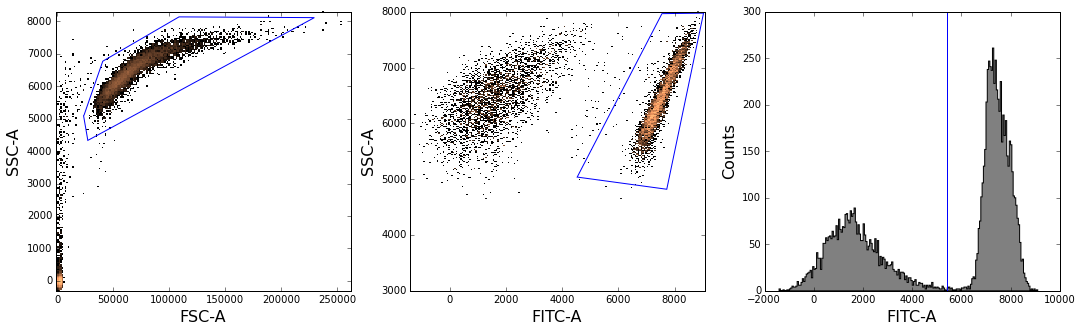

In [123]:
# I do the gating on the the untreated, arg- population
gating = samples[-10]
print gating.meta['WELL ID']

# the transformation places these channels on log(ish) scale. I wish there was a better way
gating = gating.transform( 'hlog', channels=['SSC-A','FITC-A'], b=500)

live = gating.gate( settings['liveGate'])

figsize( 18, 5)
plt.subplots(1, 3)
plt.subplot(1, 3, 1)
gating.plot(['FSC-A','SSC-A'], gates=settings['liveGate']);
plt.subplot(1, 3, 2)
live.plot(['FITC-A','SSC-A'], gates=settings['onGate']);
plt.ylim( [ 3000, 8000])
plt.subplot(1, 3, 3)
live.plot(['FITC-A'], gates=settings['histGate']);

In [122]:
# calculating the fraction on from the two gating schemes
on = live.gate( settings['onGate'])
histOn = live.gate( settings['histGate'])
print float( on.data.shape[0])/live.data.shape[0], float( histOn.data.shape[0] )/live.data.shape[0]

0.589882278078 0.59348817478


In [152]:
# now for the plate.

# apply the same hlog transformation to the plates
logPlate = plate.transform( 'hlog', channels=['SSC-A','FITC-A'], b=500)

# apply the gates
livePlate = logPlate.gate( settings['liveGate'] )
onPlate = livePlate.gate( settings['onGate'] )

In [153]:
print live.data.shape[0]
livePlate.counts()

9429


,1,2,3,4,5,6,7,8,9,10,11,12
A,17843,18929,18516,18653,19218,18642,13865,13684,13711,11040,11418,12234
B,19911,17273,16626,17980,16228,16724,20,301,12101,8915,10784,12273
C,22196,17417,18878,17660,15460,14299,11521,10669,10146,10156,8979,12247
D,23057,16339,18412,18954,16708,16407,12968,11505,12035,7754,8587,11066
E,474,17647,15082,18504,16556,15115,9851,10768,10348,9756,9740,11793
F,18426,18254,15341,16647,14812,12933,10450,10618,10185,8548,9363,9154
G,18401,15882,15485,14099,12404,11929,7837,8472,6066,3938,6270,7664
H,18348,16621,13459,11922,13539,8415,5176,7568,6566,5638,7073,9429


In [154]:
print on.data.shape[0]
onPlate.counts()

5562


,1,2,3,4,5,6,7,8,9,10,11,12
A,14556,18508,18182,18335,18909,18332,13647,13471,13473,10860,11199,11985
B,10531,12103,15784,17565,15925,16477,17,297,11912,8775,10595,12089
C,11708,9432,11797,12662,12936,12699,10508,9147,8793,8263,7241,11540
D,11578,8514,10117,10772,9796,9749,7838,6951,7226,4812,5150,6776
E,212,9133,8130,10603,9640,8910,5906,6502,6259,5984,5984,7223
F,9515,9588,8590,9315,8730,7748,6415,6525,6143,5210,5781,5607
G,9645,8429,8562,8214,7433,7081,4859,5164,3740,2431,3804,4685
H,9715,9010,7354,6930,8110,5021,3196,4645,4069,3465,4262,5562


In [174]:
# some wells had very low numbers of live cells. This may have been due to poor mixing during sample prep
qualCheck = lambda x: float( x> 1000 )

onCounts = onPlate.counts()
liveCounts = livePlate.counts()
fracs = onCounts / liveCounts

quals = onCounts.applymap(qualCheck)
print quals

   1   2   3   4   5   6   7   8   9   10  11  12
A   1   1   1   1   1   1   1   1   1   1   1   1
B   1   1   1   1   1   1   0   0   1   1   1   1
C   1   1   1   1   1   1   1   1   1   1   1   1
D   1   1   1   1   1   1   1   1   1   1   1   1
E   0   1   1   1   1   1   1   1   1   1   1   1
F   1   1   1   1   1   1   1   1   1   1   1   1
G   1   1   1   1   1   1   1   1   1   1   1   1
H   1   1   1   1   1   1   1   1   1   1   1   1


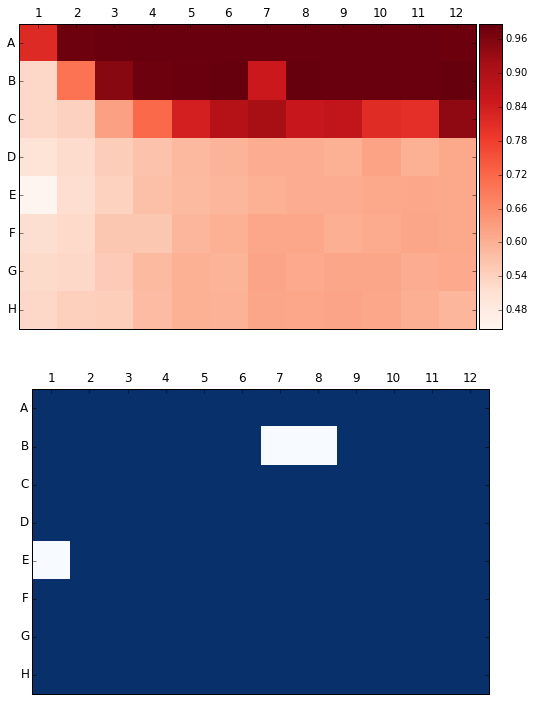

In [188]:
from GoreUtilities import plot_heat_map
from pylab import cm

figsize( 18, 12)

plt.subplots(2, 1)
plt.subplot(2, 1, 1)
plot_heat_map(fracs, show_colorbar=True)
plt.subplot(2, 1, 2)
plot_heat_map( quals, cmap=cm.Blues )


In [168]:
fracs

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.815782,0.977759,0.981962,0.982952,0.983921,0.983371,0.984277,0.984434,0.982642,0.983696,0.980820,0.979647
B,0.528904,0.700689,0.949356,0.976919,0.981329,0.985231,0.850000,0.986711,0.984381,0.984296,0.982474,0.985008
C,0.527482,0.541540,0.624907,0.716988,0.836740,0.888104,0.912074,0.857344,0.866647,0.813608,0.806437,0.942272
D,0.502147,0.521085,0.549479,0.568323,0.586306,0.594198,0.604411,0.604172,0.600415,0.620583,0.599744,0.612326
E,0.447257,0.517538,0.539053,0.573011,0.582266,0.589481,0.599533,0.603826,0.604851,0.613366,0.614374,0.612482
F,0.516390,0.525255,0.559937,0.559560,0.589387,0.599088,0.613876,0.614523,0.603142,0.609499,0.617430,0.612519
G,0.524156,0.530727,0.552922,0.582595,0.599242,0.593595,0.620008,0.609537,0.616551,0.617318,0.606699,0.611300
H,0.529486,0.542085,0.546400,0.581278,0.599010,0.596673,0.617465,0.613768,0.619708,0.614580,0.602573,0.589882


## Whats next?
1. I need a constitutively BFP expressing BY strain to tell the difference between switching off and extra growth of the ancestor
    - alternatively, this could be tested by plating onto YPD and Nat and verifying against the frequency of colonies
    
2. Canavanine appears to be mutagenic (Shor et al. 2013), so maybe not the best choice for fitness assays...

3. Why does the frequency decrease after a certain concentration of arg? What is going on in wells C8-C11?
    - new mutations?
    - switching vs out growth?